In [31]:
#Import the required libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pydotplus
import matplotlib.pyplot as plt
from six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [24]:
# Reading the dataset
dataset = pd.read_csv("dataset.csv")
print ("Total number of rows in dataset: {}\n".format(len(dataset)))
print(dataset.head())

Total number of rows in dataset: 3902

   Day  Month  Year  Humidity  Max Temperature  Min Temperature  Rainfall  \
0    1      1  2009      15.5             40.0             34.0       0.0   
1    2      1  2009      10.0             52.0             37.0       0.0   
2    3      1  2009      21.5             41.0              6.0       0.0   
3    4      1  2009      21.0             19.0              0.0       0.0   
4    5      1  2009       9.0             30.0             15.0       0.0   

   Sea Level Pressure  Sunshine  Wind Speed  Cloud  
0             29.6790       6.5        26.4      0  
1             29.4685      10.7        12.8      0  
2             29.7460      10.5         8.3      1  
3             30.3965       4.5         2.9      0  
4             29.9005       9.4        16.7      0  


In [25]:
# Cleaning the dataset
data = pd.read_csv('dataset.csv')
data.isnull().sum()
a = data['Sunshine'].median()
data['Sunshine'].fillna(a, inplace=True)
data.isnull().sum()

Day                   0
Month                 0
Year                  0
Humidity              0
Max Temperature       0
Min Temperature       0
Rainfall              0
Sea Level Pressure    0
Sunshine              0
Wind Speed            0
Cloud                 0
dtype: int64

In [26]:
# Features in the datset
features = ['Day','Month','Year','Humidity','Max Temperature','Min Temperature','Rainfall','Sea Level Pressure',
            'Sunshine','Wind Speed']
target = 'Cloud'

x_train, x_test, y_train, y_test = train_test_split(dataset[features], dataset[target], train_size=0.7, test_size=0.3, 
                                                    shuffle=False)
#Print samples after running train test split
print("X_train: {}, Y_train: {}".format(len(x_train), len(x_test)))
print("X_train: {}, Y_train: {}".format(len(y_train), len(y_test)))

print("\n")

# Decision Tree clasifier model
model = DecisionTreeClassifier(criterion='gini', splitter='best', 
                 max_depth=6, min_samples_split=2, 
                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                 max_features=None, random_state=None, 
                 max_leaf_nodes=None, min_impurity_decrease=0.0, 
                 class_weight=None 
                 )
model.fit(x_train, y_train)

# Print results to evaluate model
print("Showing Performance Metrics for Decision Tree Classifier\n")

print ("Training Accuracy: {}".format(model.score(x_train, y_train)))
predicted = model.predict(x_test)
print ("Testing Accuracy: {}".format(accuracy_score(y_test, predicted)))

training_acc1 = format(model.score(x_train, y_train))
testing_acc1 = format(accuracy_score(y_test, predicted))

print("\n")

X_train: 2731, Y_train: 1171
X_train: 2731, Y_train: 1171


Showing Performance Metrics for Decision Tree Classifier

Training Accuracy: 0.5822043207616258
Testing Accuracy: 0.4850555081127242




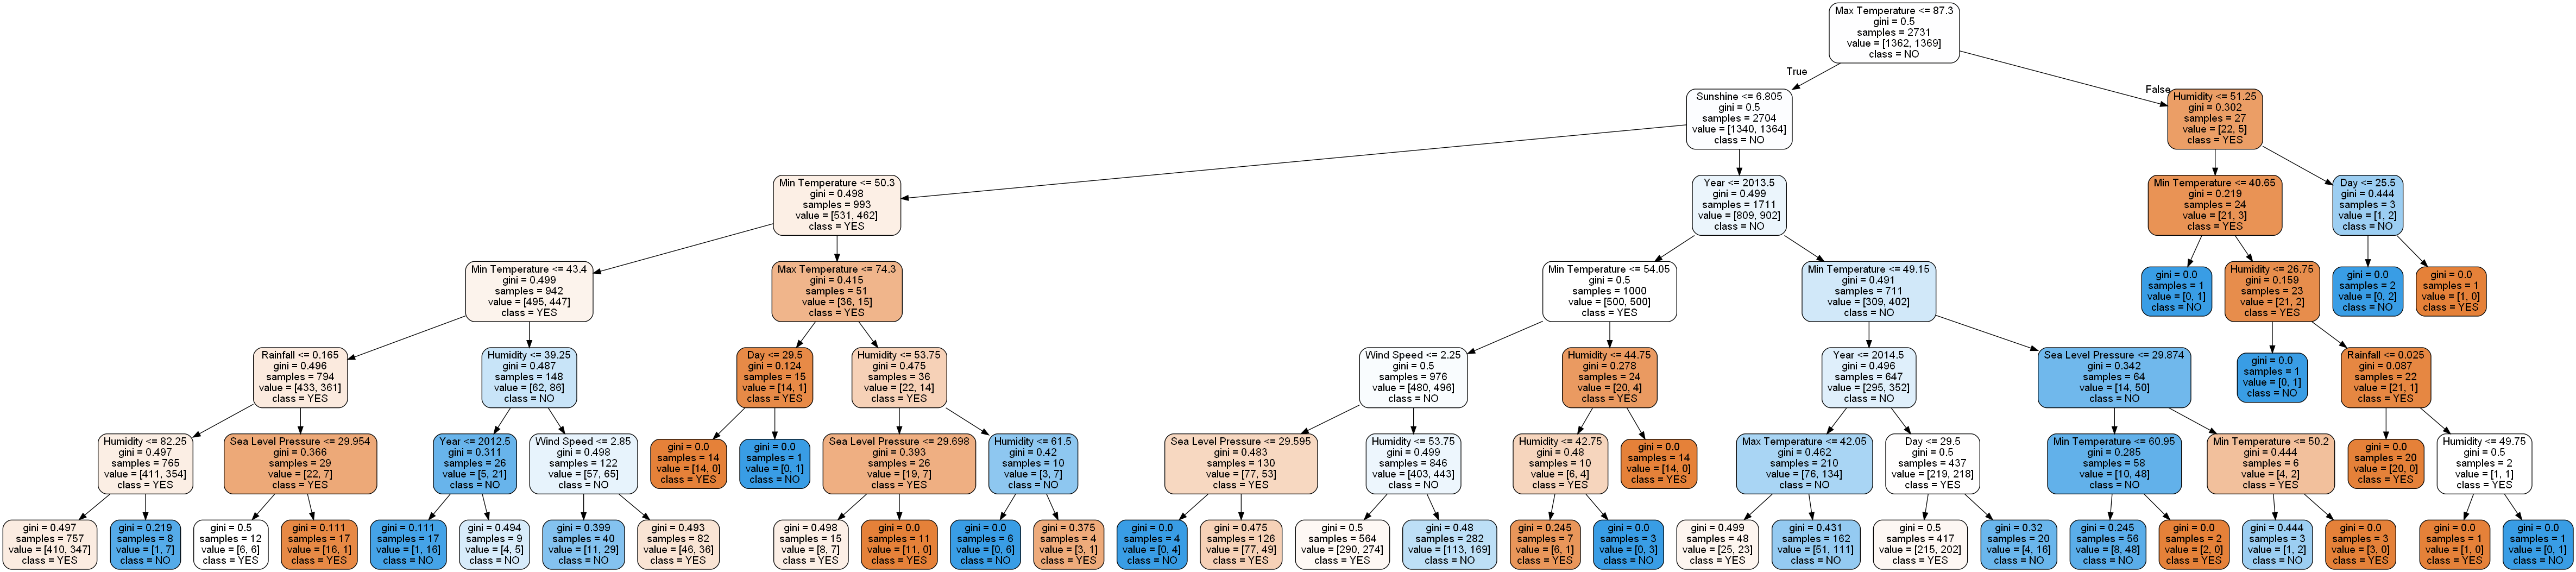

In [27]:
# making a decision tree
import os

os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin/'

ddata=tree.export_graphviz(model,out_file=None,filled=True,rounded=True,
                          feature_names=features,
                          class_names=['YES','NO'])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))


In [28]:
# Logistic Regression Model
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
model.fit(x_train, y_train)

# Print results to evaluate model
print("Showing Performance Metrics for Logistic Regression\n")

print ("Training Accuracy: {}".format(model.score(x_train, y_train)))
predicted = model.predict(x_test)
print ("Testing Accuracy: {}".format(accuracy_score(y_test, predicted)))

training_acc2 = format(model.score(x_train, y_train))
testing_acc2 = format(accuracy_score(y_test, predicted))

Showing Performance Metrics for Logistic Regression

Training Accuracy: 0.5239838886854632
Testing Accuracy: 0.515798462852263


In [29]:
# comparison between data mining methods (used above)

data_dict = {"Methods": ["Decision Tree", "Logistic Regression"],
            "Training Accuracy": [training_acc1, training_acc2],
            "Testing Accuracy": [testing_acc1, testing_acc2],
            }
#convert that into a dataframe
data_df = pd.DataFrame(data_dict)
#show the dictionary
data_df

,Methods,Training Accuracy,Testing Accuracy
0,Decision Tree,0.5822043207616258,0.4850555081127242
1,Logistic Regression,0.5239838886854632,0.515798462852263


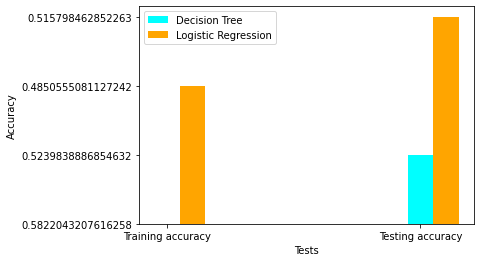

In [30]:
# create data
x = np.arange(2)
y1 = [training_acc1, training_acc2]
y2 = [testing_acc1, testing_acc2]
width = 0.1

# plot data in grouped manner of bar type
plt.bar(x, y1, width, color='cyan')
plt.bar(x+0.1, y2, width, color='orange')
plt.xticks(x, ['Training accuracy', 'Testing accuracy'])
plt.xlabel("Tests")
plt.ylabel("Accuracy")
plt.legend(["Decision Tree", "Logistic Regression"])
plt.show()
#end